<a href="https://colab.research.google.com/github/mstkyvz/BBB/blob/main/BBB_%C4%B0TFA%C4%B0YE_%C3%87A%C4%9ERI_M%C3%9CDAHALE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
!pip install kaleido
import kaleido
import warnings # warningleir gizler
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import json
import pandas as pd

# JSON dosyasını okuyun
with open('veriler.json', 'r') as f:
    json_data = json.load(f)

# JSON verilerini bir pandas veri çerçevesine dönüştürün
df = pd.DataFrame(json_data)


In [50]:
ihbar_tipi_sayilari = df['İhbar Tipi'].value_counts()
print(ihbar_tipi_sayilari)


YUZ_ON_IKI_CAGRI    9310
ASILSIZ_IHBAR        219
DIGER                177
TAKVIYE_AMACLI        39
KONTROL               19
Name: İhbar Tipi, dtype: int64


In [51]:
yangin_nedeni_sayilari = df['Yangın Nedeni'].value_counts()
print(yangin_nedeni_sayilari)


Sigara              1834
Dikkatsizlik        1442
Kasıt               1244
Tedbirsizlik        1199
Elektrik Kontağı     935
Tespit Edilemedi     735
Asılsız İhbar        583
Doğal Olaylar        421
Diğer                314
Yangın Zannı         291
İhmal                272
Şüpheli              154
Arıza                147
Gaz Kaçağı            74
                      43
Tatbikat              22
Sabotaj               19
Trafik Kazası         14
Takviye Amaçlı        11
Akaryakıt             10
Name: Yangın Nedeni, dtype: int64


In [52]:
df['Çıkış Tarihi'] = pd.to_datetime(df['Çıkış Tarihi'])
df['Olay Yerine Ulaşım Saati'] = pd.to_datetime(df['Olay Yerine Ulaşım Saati'])
df['Yangın Söndürme Saati'] = pd.to_datetime(df['Yangın Söndürme Saati'])

df['Müdahale Süresi'] = df['Olay Yerine Ulaşım Saati'] - df['Çıkış Tarihi']
df['Söndürme Süresi'] = df['Yangın Söndürme Saati'] - df['Olay Yerine Ulaşım Saati']

mudahale_suresi_ortalama = df['Müdahale Süresi'].mean()
söndürme_suresi_ortalama = df['Söndürme Süresi'].mean()

print(f"Ortalama müdahale süresi: {mudahale_suresi_ortalama}")
print(f"Ortalama söndürme süresi: {söndürme_suresi_ortalama}")


Ortalama müdahale süresi: 0 days 00:26:39.782340862
Ortalama söndürme süresi: -1 days +20:55:04.381987254


In [53]:
tahmini_zarar_toplam = df['Tahmini Zarar'].sum()
tahmini_zarar_ortalama = df['Tahmini Zarar'].mean()

print(f"Toplam tahmini zarar: {tahmini_zarar_toplam}")
print(f"Ortalama tahmini zarar: {tahmini_zarar_ortalama}")


TypeError: ignored

In [ ]:
en_cok_yangin_ilce = df['İlçe Adı'].value_counts().index[0]
en_cok_yangin_mahalle = df['Mahalle'].value_counts().index[0]
en_cok_yangin_sokak = df['Sokak'].value_counts().index[0]

In [ ]:
import matplotlib.pyplot as plt

ihbar_tipi_sayilari = df['İhbar Tipi'].value_counts()

plt.bar(ihbar_tipi_sayilari.index, ihbar_tipi_sayilari.values)
plt.title('İhbar Tipleri')
plt.xlabel('İhbar Tipleri')
plt.ylabel('Sayı')
plt.xticks(rotation=45)
plt.show("png")


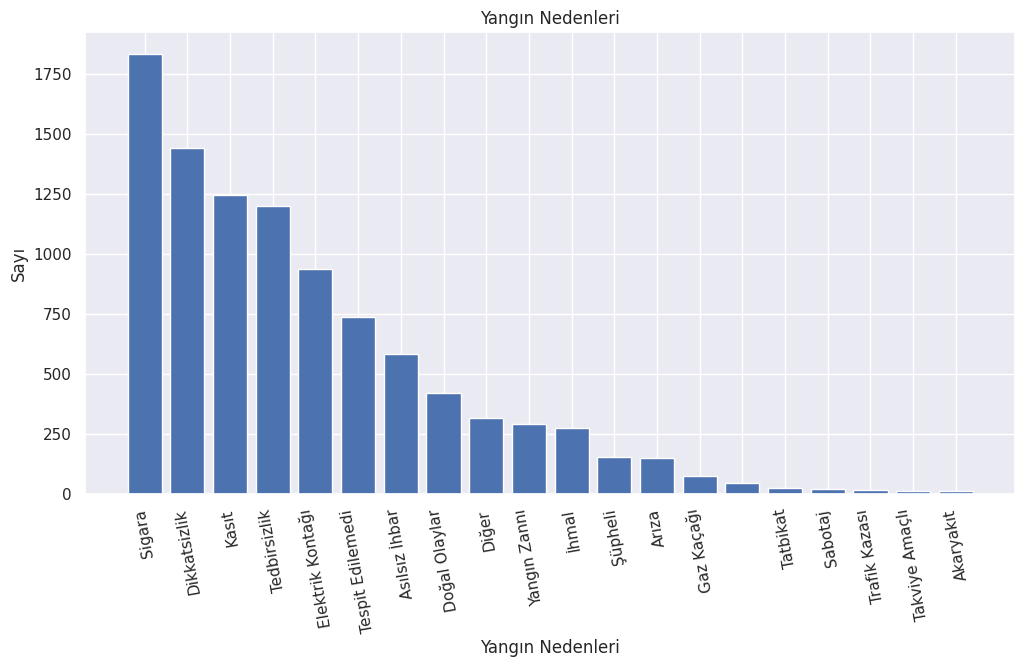

In [54]:
yangin_nedeni_sayilari = df['Yangın Nedeni'].value_counts()

plt.bar(yangin_nedeni_sayilari.index, yangin_nedeni_sayilari.values)
plt.title('Yangın Nedenleri')
plt.xlabel('Yangın Nedenleri')
plt.ylabel('Sayı')
plt.xticks(rotation=100)
plt.show("png")


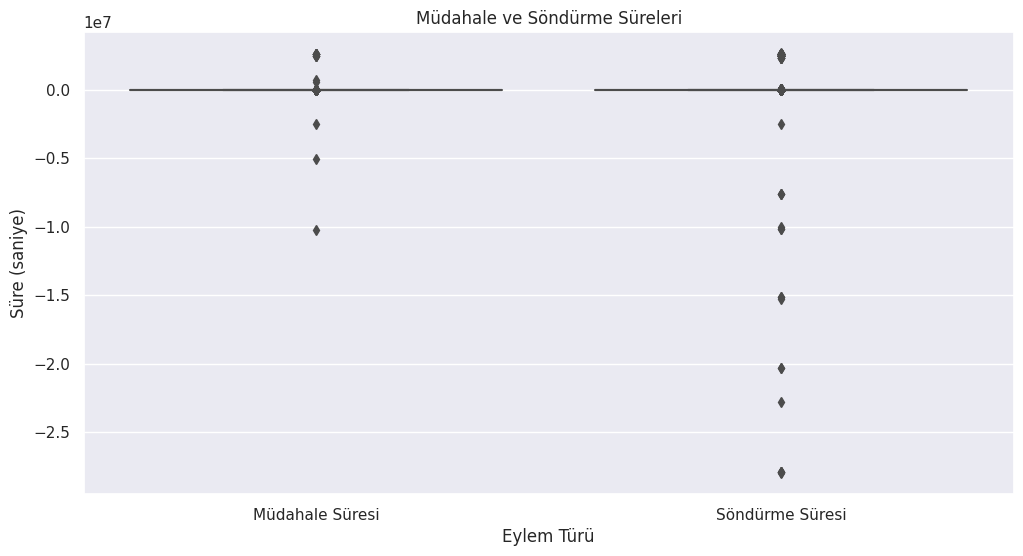

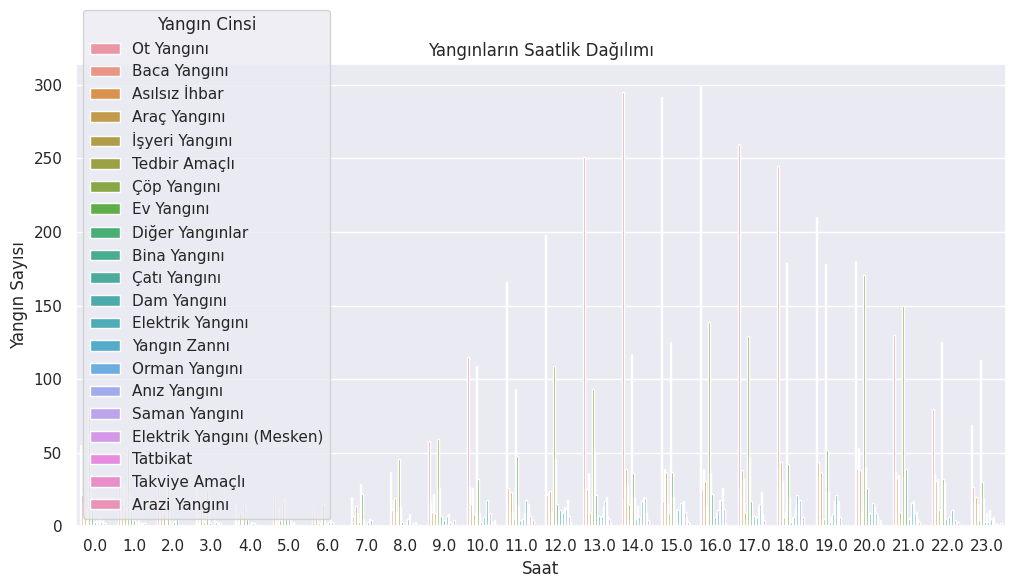

In [55]:
import seaborn as sns

df['Çıkış Tarihi'] = pd.to_datetime(df['Çıkış Tarihi'])
df['Olay Yerine Ulaşım Saati'] = pd.to_datetime(df['Olay Yerine Ulaşım Saati'])
df['Yangın Söndürme Saati'] = pd.to_datetime(df['Yangın Söndürme Saati'])

df['Müdahale Süresi'] = (df['Olay Yerine Ulaşım Saati'] - df['Çıkış Tarihi']).dt.total_seconds()
df['Söndürme Süresi'] = (df['Yangın Söndürme Saati'] - df['Olay Yerine Ulaşım Saati']).dt.total_seconds()

sns.boxplot(data=df[['Müdahale Süresi', 'Söndürme Süresi']])
plt.title('Müdahale ve Söndürme Süreleri')
plt.xlabel('Eylem Türü')
plt.ylabel('Süre (saniye)')
plt.xticks([0, 1], ['Müdahale Süresi', 'Söndürme Süresi'])
plt.show("png")

df['Saat'] = df['Çıkış Tarihi'].dt.hour

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Saat', hue='Yangın Cinsi', data=df)
plt.title('Yangınların Saatlik Dağılımı')
plt.xlabel('Saat')
plt.ylabel('Yangın Sayısı')
plt.show("png")


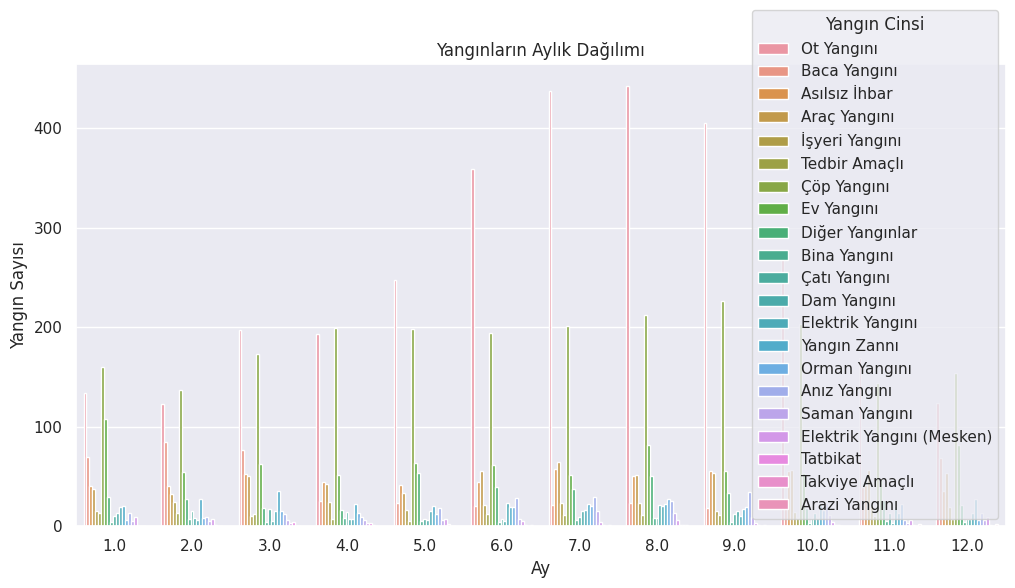

In [58]:
df['Ay'] = df['Çıkış Tarihi'].dt.month

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Ay', hue='Yangın Cinsi', data=df)
plt.title('Yangınların Aylık Dağılımı')
plt.xlabel('Ay')
plt.ylabel('Yangın Sayısı')
plt.show("png")


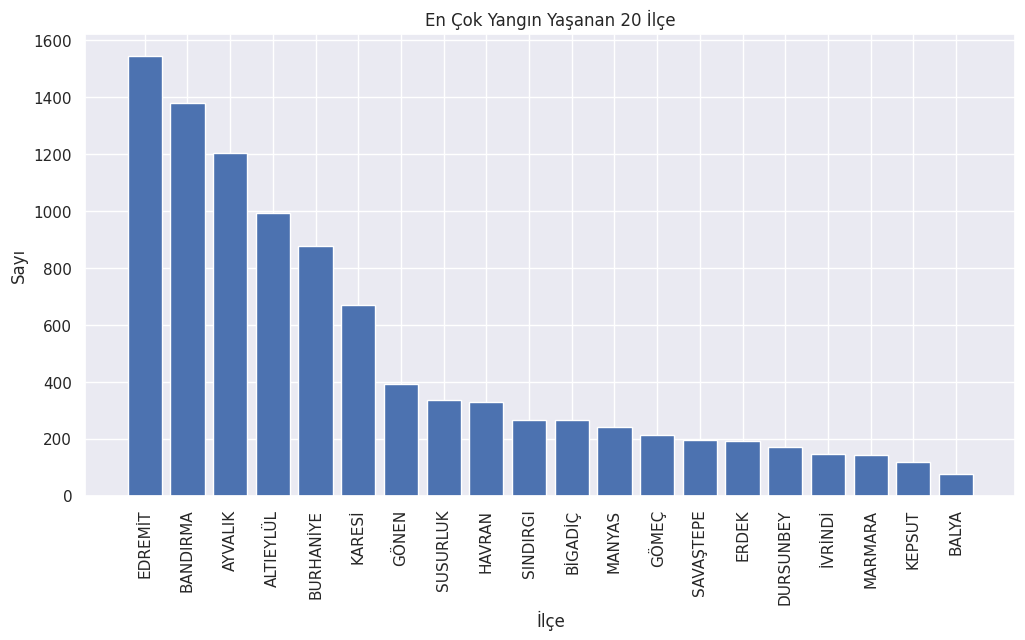

In [59]:
en_cok_yangin_ilceler = df['İlçe Adı'].value_counts().nlargest(20)

plt.bar(en_cok_yangin_ilceler.index, en_cok_yangin_ilceler.values)
plt.title('En Çok Yangın Yaşanan 20 İlçe')
plt.xlabel('İlçe')
plt.ylabel('Sayı')
plt.xticks(rotation=90)
plt.show("png")


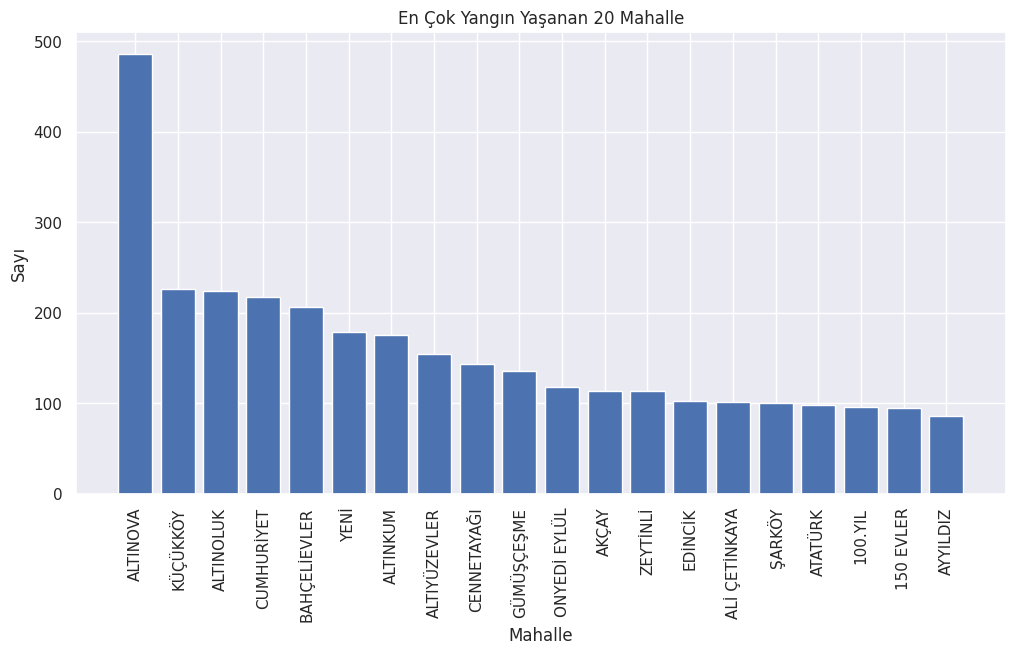

In [60]:
en_cok_yangin_mahalleler = df['Mahalle'].value_counts().nlargest(20)

plt.bar(en_cok_yangin_mahalleler.index, en_cok_yangin_mahalleler.values)
plt.title('En Çok Yangın Yaşanan 20 Mahalle')
plt.xlabel('Mahalle')
plt.ylabel('Sayı')
plt.xticks(rotation=90)
plt.show("png")


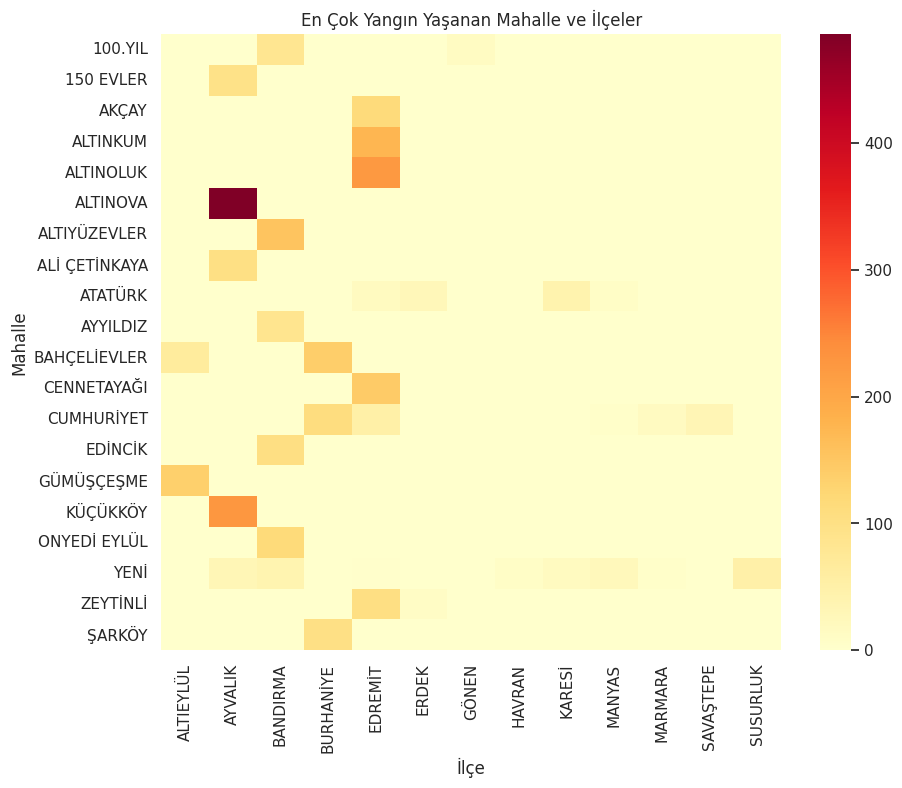

In [61]:
import seaborn as sns

en_cok_yangin_ilceler = df['İlçe Adı'].value_counts().nlargest(20)
en_cok_yangin_mahalleler = df['Mahalle'].value_counts().nlargest(20)
df_filtered = df[(df['İlçe Adı'].isin(en_cok_yangin_ilceler.index)) & (df['Mahalle'].isin(en_cok_yangin_mahalleler.index))]

heatmap_data = df_filtered.groupby(['Mahalle', 'İlçe Adı']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd')
plt.title('En Çok Yangın Yaşanan Mahalle ve İlçeler')
plt.xlabel('İlçe')
plt.ylabel('Mahalle')
plt.show("png")
